In [36]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("Exercice_6.csv")
df.head()

,poids
0,49
1,83
2,89
3,86
4,65


In [39]:
min = np.floor(df.poids.min() / 5) * 5
max = np.ceil(df.poids.max() / 5) * 5
nb_bins = int((max - min)/5) + 1
min, max, nb_bins

(45.0, 95.0, 11)

In [40]:
bins = [45 + x * 5 for x in range(nb_bins)]
bins

[45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [71]:
discret = pd.cut(df.poids, bins,  right=False)
s = discret.value_counts().sort_index()
s

[45, 50)     2
[50, 55)     4
[55, 60)     6
[60, 65)    12
[65, 70)    13
[70, 75)    12
[75, 80)     7
[80, 85)     7
[85, 90)     6
[90, 95)     1
Name: poids, dtype: int64

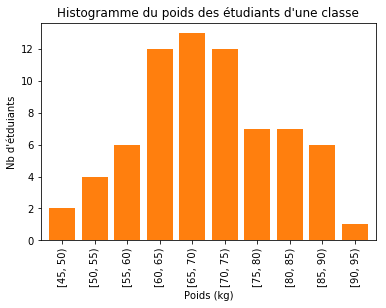

In [66]:
g = s.plot.bar(title="Histogramme du poids des étudiants d'une classe", color=['tab:orange',]*12, width=0.8)
g.set_xlabel("Poids (kg)")
g.set_ylabel("Nb d'étduiants");

In [57]:
table = s.to_frame("Effectifs")

In [58]:
table["Fréquences"] = table.apply(lambda n: n / table["Effectifs"].sum() )

In [59]:
table["Effectifs cumulés croissants"] = s.cumsum()

In [60]:
table["Fréquences cumulées croissantes"] = table["Effectifs cumulés croissants"].apply(lambda n: n / table["Effectifs"].sum() )

In [61]:
table["Effectifs cumulés décroissants"] = table["Effectifs"].loc[::-1].cumsum()

In [62]:
table["Fréquences cumulées décroissantes"] = table["Effectifs cumulés décroissants"].apply(lambda n: n / table["Effectifs"].sum() )

In [63]:
table

,Effectifs,Fréquences,Effectifs cumulés croissants,Fréquences cumulées croissantes,Effectifs cumulés décroissants,Fréquences cumulées décroissantes
"[45, 50)",2,0.028571,2,0.028571,70,1.000000
"[50, 55)",4,0.057143,6,0.085714,68,0.971429
"[55, 60)",6,0.085714,12,0.171429,64,0.914286
"[60, 65)",12,0.171429,24,0.342857,58,0.828571
"[65, 70)",13,0.185714,37,0.528571,46,0.657143
"[70, 75)",12,0.171429,49,0.700000,33,0.471429
"[75, 80)",7,0.100000,56,0.800000,21,0.300000
"[80, 85)",7,0.100000,63,0.900000,14,0.200000
"[85, 90)",6,0.085714,69,0.985714,7,0.100000
"[90, 95)",1,0.014286,70,1.000000,1,0.014286
